In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv

nfl_data_path = "output_data/nfl.csv"

nfl_data = pd.read_csv(nfl_data_path, encoding="latin1")

nfl_data

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,10809,9/5/2013,2013,1,False,DEN,49,27,BAL,DEN,-7.5,49.5,Sports Authority Field at Mile High,False,83.0,7.0,30.0,NaN
1,10810,9/8/2013,2013,1,False,BUF,21,23,NE,NE,-10.5,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
2,10811,9/8/2013,2013,1,False,CAR,7,12,SEA,SEA,-3.5,45.0,Bank of America Stadium,False,87.0,7.0,48.0,NaN
3,10812,9/8/2013,2013,1,False,CHI,24,21,CIN,CHI,-3.0,42.0,Soldier Field,False,77.0,13.0,79.0,NaN
4,10813,9/8/2013,2013,1,False,CLE,10,23,MIA,CLE,-2.5,40.5,FirstEnergy Stadium,False,72.0,16.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,13511,1/22/2023,2022,Division,True,BUF,10,27,CIN,BUF,-6.0,48.5,Highmark Stadium,False,32.0,4.0,100.0,snow
2703,13512,1/22/2023,2022,Division,True,SF,19,12,DAL,SF,-3.5,46.5,Levi's Stadium,False,55.0,19.0,47.0,NaN
2704,13513,1/29/2023,2022,Conference,True,KC,23,20,CIN,KC,-1.5,48.0,GEHA Field at Arrowhead Stadium,False,22.0,13.0,55.0,NaN
2705,13514,1/29/2023,2022,Conference,True,PHI,31,7,SF,PHI,-2.5,45.5,Lincoln Financial Field,False,52.0,14.0,48.0,rain


In [2]:
nfl_data.isnull().sum()

Unnamed: 0                0
schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home                0
score_away                0
team_away                 0
team_favorite_id          0
spread_favorite           0
over_under_line           0
stadium                   0
stadium_neutral           0
weather_temperature     704
weather_wind_mph        705
weather_humidity       2441
weather_detail         1861
dtype: int64

In [12]:
# seperate columns needed

nfl_clean_df = nfl_data[["schedule_season", "team_home", "score_home", "team_away", "score_away", "over_under_line"]].copy()

# Add an empty column for the score total
nfl_clean_df["Total Score"] = ""

nfl_clean_df


,schedule_season,team_home,score_home,team_away,score_away,over_under_line,Total Score
0,2013,DEN,49,BAL,27,49.5,
1,2013,BUF,21,NE,23,51.5,
2,2013,CAR,7,SEA,12,45.0,
3,2013,CHI,24,CIN,21,42.0,
4,2013,CLE,10,MIA,23,40.5,
...,...,...,...,...,...,...,...
2702,2022,BUF,10,CIN,27,48.5,
2703,2022,SF,19,DAL,12,46.5,
2704,2022,KC,23,CIN,20,48.0,
2705,2022,PHI,31,SF,7,45.5,


In [13]:
#rename columns

# Rename multiple columns
nfl_clean_df = nfl_clean_df.rename(columns={'schedule_season': 'Season', 'team_home': 'Home Team', 'score_home': 'Home Team Score', 'team_away': 'Away Team', 'score_away': 'Away Team Score', 'over_under_line': 'Over/Under'})

# Display the updated DataFrame
nfl_clean_df




,Season,Home Team,Home Team Score,Away Team,Away Team Score,Over/Under,Total Score
0,2013,DEN,49,BAL,27,49.5,
1,2013,BUF,21,NE,23,51.5,
2,2013,CAR,7,SEA,12,45.0,
3,2013,CHI,24,CIN,21,42.0,
4,2013,CLE,10,MIA,23,40.5,
...,...,...,...,...,...,...,...
2702,2022,BUF,10,CIN,27,48.5,
2703,2022,SF,19,DAL,12,46.5,
2704,2022,KC,23,CIN,20,48.0,
2705,2022,PHI,31,SF,7,45.5,


In [15]:
# add score_home and score_away and create total score
nfl_clean_df["Total Score"]=nfl_clean_df["Home Team Score"]+nfl_clean_df["Away Team Score"]

nfl_clean_df



,Season,Home Team,Home Team Score,Away Team,Away Team Score,Over/Under,Total Score
0,2013,DEN,49,BAL,27,49.5,76
1,2013,BUF,21,NE,23,51.5,44
2,2013,CAR,7,SEA,12,45.0,19
3,2013,CHI,24,CIN,21,42.0,45
4,2013,CLE,10,MIA,23,40.5,33
...,...,...,...,...,...,...,...
2702,2022,BUF,10,CIN,27,48.5,37
2703,2022,SF,19,DAL,12,46.5,31
2704,2022,KC,23,CIN,20,48.0,43
2705,2022,PHI,31,SF,7,45.5,38


In [16]:
# Add an empty column for the score total
nfl_clean_df["Status"] = ""

nfl_clean_df


,Season,Home Team,Home Team Score,Away Team,Away Team Score,Over/Under,Total Score,Status
0,2013,DEN,49,BAL,27,49.5,76,
1,2013,BUF,21,NE,23,51.5,44,
2,2013,CAR,7,SEA,12,45.0,19,
3,2013,CHI,24,CIN,21,42.0,45,
4,2013,CLE,10,MIA,23,40.5,33,
...,...,...,...,...,...,...,...,...
2702,2022,BUF,10,CIN,27,48.5,37,
2703,2022,SF,19,DAL,12,46.5,31,
2704,2022,KC,23,CIN,20,48.0,43,
2705,2022,PHI,31,SF,7,45.5,38,


In [19]:
# determine whether it was over or under for that game
nfl_clean_df["Status"] = nfl_clean_df.apply(lambda x:  'Under'   if x['Over/Under'] > x['Total Score'] else 'Over', axis=1)

nfl_clean_df

,Season,Home Team,Home Team Score,Away Team,Away Team Score,Over/Under,Total Score,Status
0,2013,DEN,49,BAL,27,49.5,76,Over
1,2013,BUF,21,NE,23,51.5,44,Under
2,2013,CAR,7,SEA,12,45.0,19,Under
3,2013,CHI,24,CIN,21,42.0,45,Over
4,2013,CLE,10,MIA,23,40.5,33,Under
...,...,...,...,...,...,...,...,...
2702,2022,BUF,10,CIN,27,48.5,37,Under
2703,2022,SF,19,DAL,12,46.5,31,Under
2704,2022,KC,23,CIN,20,48.0,43,Under
2705,2022,PHI,31,SF,7,45.5,38,Under


In [23]:
nfl_clean_df.groupby(["Season", "Status"]).count()

Home Team  Home Team Score  Away Team  Away Team Score  \
Season Status                                                           
2013   Over          139              139        139              139   
       Under         128              128        128              128   
2014   Over          127              127        127              127   
       Under         140              140        140              140   
2015   Over          128              128        128              128   
       Under         139              139        139              139   
2016   Over          145              145        145              145   
       Under         122              122        122              122   
2017   Over          122              122        122              122   
       Under         145              145        145              145   
2018   Over          127              127        127              127   
       Under         140              140        140              140   
2019   Over          134              134        134              134   
       Under         133              133        133              133   
2020   Over          141              141        141              141   
       Under         128              128        128              128   
2021   Over          132              132        132              132   
       Under         153              153        153              153   
2022   Over          128              128        128              128   
       Under         156              156        156              156   

               Over/Under  Total Score  
Season Status                           
2013   Over           139          139  
       Under          128          128  
2014   Over           127          127  
       Under          140          140  
2015   Over           128          128  
       Under          139          139  
2016   Over           145          145  
       Under          122          122  
2017   Over           122          122  
       Under          145          145  
2018   Over           127          127  
       Under          140          140  
2019   Over           134          134  
       Under          133          133  
2020   Over           141          141  
       Under          128          128  
2021   Over           132          132  
       Under          153          153  
2022   Over           128          128  
       Under          156          156

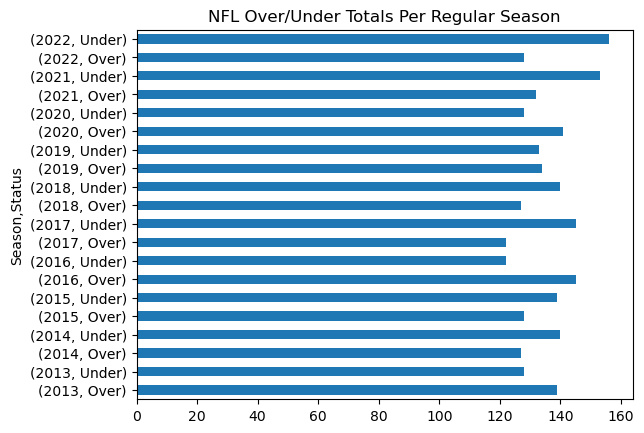

In [36]:
Over = []
Under = []

index = []

plt.xlabel("Over/Under Line")
plt.ylabel("Season")


plt.title("NFL Over/Under Totals Per Regular Season")
over_under_count.plot.barh()

In [39]:
over_under_count

Season  Status
2013    Over      139
        Under     128
2014    Over      127
        Under     140
2015    Over      128
        Under     139
2016    Over      145
        Under     122
2017    Over      122
        Under     145
2018    Over      127
        Under     140
2019    Over      134
        Under     133
2020    Over      141
        Under     128
2021    Over      132
        Under     153
2022    Over      128
        Under     156
Name: Total Score, dtype: int64

In [50]:
test_df = over_under_count.reset_index(level=['Season', 'Status'])


In [51]:
test_df

,Season,Status,Total Score
0,2013,Over,139
1,2013,Under,128
2,2014,Over,127
3,2014,Under,140
4,2015,Over,128
5,2015,Under,139
6,2016,Over,145
7,2016,Under,122
8,2017,Over,122
9,2017,Under,145


In [ ]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = nfl_clean_df["Status"].values
df = pd.DataFrame({'speed': speed,
                    'lifespan': lifespan}, index=index)
ax = df.plot.barh()

In [ ]:
teams = nfl_data["team_home"].value_counts() 
print(teams)

In [ ]:
teams.plot(kind="bar", figsize=(12,5))

In [ ]:
x = nfl_data["team_home"]
y = nfl_data["over_under_line"]

plt.scatter(x, y,)
plt.xticks(rotation=90)
plt.xlabel("NFL Team")
plt.ylabel("Over/Under Line")

plt.savefig("images/overunderscatterall.png")
plt.show()

In [ ]:
x = nfl_data["team_home"]
y = nfl_data["spread_favorite"]

plt.scatter(x, y)
plt.xticks(rotation=90)

plt.show()

In [ ]:
NE_df = nfl_data[(nfl_data["team_home"]=="NE")|(nfl_data["team_away"]=="NE")]

NE_df

In [ ]:
x = NE_df["team_home"]
y = NE_df["over_under_line"]

plt.scatter(x, y)
plt.xticks(rotation=90)

plt.show()

In [ ]:
#group by schedule_season
season_year = NE_df.groupby(["schedule_season"]).count()
print(season_year)

In [ ]:
plt.scatter()
plt.xlabel()
plt.ylabel()
plt.title()

